<a href="https://colab.research.google.com/github/1013115/KTB_Project/blob/main/Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agent

langchain 및 기타 LLM 애플리케이션에서 중요한 개념으로, 인공지능 시스템이 더 자율적이고 목표 지향적으로 작업을 수행할 수 있게 해주는 컴포넌트이다. 에이전트는 주어진 목표를 달성하기 위해 환경과 상호작용하며 의사 결정을 내리고 행동을 취하는 지능형 개체로 볼 수 있다.

**<주요 특징>**
1. 자율성 : 에이전트는 사전에 정의된 규칙이나 명시적인 프로그래밍 없이도 스스로 결정을 내리고 행동할 수 있다.
2. 목표 지향성 : 특정 목표나 작업을 달성하기 위해 설계되어있음
3. 환경 인식 : 주변 환경이나 상황을 인식하고 이에 따라 적응할 수 있다.
4. 도구 사용 : 다양한 도구나 API를 활용하여 작업을 수행할 수 있다.
5. 연속성 : 주어진 목표를 달성하기 위하여 1회 수행이 아닌 반복 수행을 통해 목표 달성을 추구한다.

### LangChain애서의 에이전트
1. Agent : 의사 결정을 담당하는 핵심 컴포넌트
2. Tools : 에이전트가 사용할 수 있는 기능들의 집합
3. Toolkits : 관련된 도구들의 그룹
4. AgentExecutor : 에이전트의 실행을 관리하는 컴포넌트

### 에이전트 작동방식
1. 입력 수신 : 사용자로부터 작업이나 질문을 받는다.
2. 계획 수립 : 주어진 작업을 완료하기 위한 단계별 계획을 세운다.
3. 도구 선택 : 각 단계에 적합한 도구를 선택한다.
4. 실행 : 선택한 도구를 사용하여 작업을 수행한다.
5. 결과 평가 : 수행 결과를 평가하고 필요시 계획을 조정한다.
6. 출력 생성 : 최종 결과나 답변을 사용자에게 제공한다.

<장점과 한계>

장점
- 복잡한 작업의 자동화
- 유연성과 적응성
- 다양항 도구와 통합 가능성

한계
- 제어와 예측 가능성의 어려움
- 계산 비용와 리소스 요구사항


## 도구
에이전트, 체인 또는 LLM이 외부 세계와 상호작용하기 위한 인터페이스이다.

langchain에서 기본 제공하는 도구를 사용하여 쉽게 도구를 활용할 수 있으며, 사용자 정의 도구를 쉽게 구축하는 것도 가능하다.

In [11]:
import os
from google.colab import userdata
#os.environ['OPENAI_API_KEY'] = 'OPEN_API_KEY'
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY'
)

In [12]:
!pip install python_dotenv

In [13]:
import os
from google.colab import userdata

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "test"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')

In [15]:
!pip install langchain_teddynote

  Using cached protobuf-4.25.5-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Using cached protobuf-4.25.5-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [95]:
from langchain_teddynote import logging

logging.langsmith("agent")

LangSmith 추적을 시작합니다.
[프로젝트명]
agent


In [16]:
import warnings

warnings.filterwarnings("ignore")

In [17]:
!pip install langchain

In [18]:
!pip install -U langchain-openai

### 빌트인 도구
랭체인에서 제공하는 사전에 정의된 도구와 툴킷을 사용할 수 있다.

tool은 단일 도구를 의미하며, toolkit은 여러 도구를 묶어서 하나의 도구로 사용할 수 있다.


---
**1. python REPL 도구**

이 도구는 python 코드를 REPL(Read-Eval-Print Loop)환경에서 실행하기 위한 두가지 주요 클래스를 제공한다.



In [19]:
!pip install langchain-experimental

In [100]:
from langchain_experimental.tools import PythonREPLTool

python_tool = PythonREPLTool()

In [101]:
print(python_tool.run("print(100+200)"))

300



LLM에게 파이썬 코드를 작성하도록 요청

In [102]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda

def print_and_execute(code, debug=True):
  if debug:
    print("CODE:")
    print(code)

  return python_tool.invoke(code)

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are Raymond Hetting, and expert python programmer, well versed in meta-programming and elegant, concise and short but well documented code. You follow the PEP8 style guide."
            "Return only the code, no intro, no explanation, no chatty, no markdown, no code block, no nothing. Just the code.",
        ),
        ("human","{input}"),
    ]
)

llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

chain = prompt | llm | StrOutputParser() | RunnableLambda(print_and_execute)

In [103]:
print(chain.invoke("로또 번호 생성기를 출력하는 코드를 작성하시오"))

CODE:
import random

def generate_lotto_numbers():
    return sorted(random.sample(range(1, 46), 6))

print(generate_lotto_numbers())
[8, 14, 15, 22, 25, 37]



**2. 검색 API 도구**

Tavily 검색 API를 활용하여 검색 기능을 구현한 도구이다.

- Tavily 검색 API를 쿼리하고 JSON 형식의 결과를 반환한다.
- 포괄적이고 정확하며 신뢰할 수 있는 결과에 최적화된 검색 엔진이다
- 현재 이벤트에 대한 질문에 답변할 때 유용하다.

주요 매개변수

- max_results (int): 반환할 최대 검색 결과 수 (기본값: 5)
- search_depth (str): 검색 깊이 ("basic" 또는 "advanced")
- include_domains (List[str]): 검색 결과에 포함할 도메인 목록
- exclude_domains (List[str]): 검색 결과에서 제외할 도메인 목록
- include_answer (bool): 원본 쿼리에 대한 짧은 답변 포함 여부
- include_raw_content (bool): 각 사이트의 정제된 HTML 콘텐츠 포함 여부
- include_images (bool): 쿼리 관련 이미지 목록 포함 여부



In [83]:


import os
from google.colab import userdata

os.environ['TAVILY_API_KEY'] = userdata.get('TAVILY_API_KEY')

In [105]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool= TavilySearchResults(
    max_results = 6,
    include_answer=True,
    include_raw_content=True,
    # include_images=True,
    # search_depth="advanced", # or "basic"
    #include_domains=["github.io", "wikidocs.net"],
    # exclude_domains = []
)

In [106]:
tool.invoke({"query":"LangChain Tools"})

[{'url': 'https://python.langchain.com/docs/how_to/custom_tools/',
  'content': 'BaseTool is a# Pydantic class and not having type hints can lead to unexpected behavior.class CustomCalculatorTool(BaseTool):    name: str = "Calculator"    description: str = "useful for when you need to answer questions about math"    args_schema: Type[BaseModel] = CalculatorInput    return_direct: bool = True    def _run(        self, a: int, b: int, run_manager: Optional[CallbackManagerForToolRun] = None    ) -> str:        """Use the tool."""        return a * b    async def _arun(        self,        a: int,        b: int,        run_manager: Optional[AsyncCallbackManagerForToolRun] = None,    ) -> str:        """Use the tool asynchronously."""        # If the calculation is cheap, you can just delegate to the sync implementation        # as shown below. from langchain_core.tools import StructuredTooldef multiply(a: int, b: int) -> int:    """Multiply two numbers."""    return a * bcalculator = Struc

**3. Image 생성도구 (DALL-E)**

 DALL-E API를 쉽게 통합하여 텍스트 기반 이미지 생성 기능을 구현

- DallEAPIWrapper 클래스: OpenAI의 DALL-E 이미지 생성기를 위한 래퍼(wrapper)

<주요속성>
- model: 사용할 DALL-E 모델 이름 (기본값: "dall-e-2", "dall-e-3")

- n: 생성할 이미지 수 (기본값: 1)

- size: 생성할 이미지 크기

- "dall-e-2": "1024x1024", "512x512", "256x256"
- "dall-e-3": "1024x1024", "1792x1024", "1024x1792"

- style: 생성될 이미지의 스타일 (기본값: "natural", "vivid")

- quality: 생성될 이미지의 품질 (기본값: "standard", "hd")

- max_retries: 생성 시 최대 재시도 횟수

In [107]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.9, max_tokens=1000)

prompt = PromptTemplate.from_template(
     "Generate a detailed IMAGE GENERATION prompt for DALL-E based on the following description. "
    "Return only the prompt, no intro, no explanation, no chatty, no markdown, no code block, no nothing. Just the prompt"
    "Output should be less than 1000 characters. Write in English only."
    "Image Description: \n{image_desc}",
)

chain = prompt | llm | StrOutputParser()

image_prompt = chain.invoke(
   {"image_desc": "스마트폰을 바라보는 사람들을 풍자한 neo-classicism painting"}
)

print(image_prompt)

Create a neo-classical painting that satirizes individuals engrossed in their smartphones. The scene should depict a group of people in a grand, classical setting, reminiscent of ancient Greek or Roman architecture, with ornate columns and marble statues in the background. Each person, dressed in traditional classical attire, such as togas or flowing robes, should be gazing intently at their smartphones, completely oblivious to their surroundings. Their facial expressions should range from amusement to frustration, highlighting the disconnect between their digital engagement and the beauty of the classical environment around them. Use rich, vibrant colors and dramatic lighting to enhance the contrast between the historical elements and the modern technology they are fixated on. The overall mood should be a mix of humor and irony, capturing the absurdity of contemporary distractions in a timeless setting.


**4. 사용자 정의 도구**

langchain에서 제공하는 빌트인 도구 외에도 사용자가 직접 도구를 정의하여 사용할 수 있다.

이를 위해서는 langchain.tools 모듈에서 제공하는 tool 데코레이터를 사용하여 함수를 도구로 변환한다.

`@tool`데코레이터는 함수를 도구로 변환하는 기능을 제공한다.

In [108]:
from langchain.tools import tool

@tool
def add_number(a:int, b:int) -> int:
  """Add two numbers"""
  return a + b

@tool
def multiply_number(a:int, b:int) -> int:
  """Multiply two numbers"""
  return a * b

In [109]:
add_number.invoke({"a":10, "b":20})

30

In [110]:
multiply_number.invoke({"a":10, "b":20})

200

**5. 구글 뉴스기사 검색 도구**

- langchain-teddynote 패키지에서 제공하는 GoogleNews 도구를 사용하여 구글 뉴스기사를 검색하는 도구

- RSS 피드를 사용하기 떄문에 API 키가 필요하지 않다

In [111]:
from langchain_teddynote.tools import GoogleNews

news_tool = GoogleNews()

In [112]:
news_tool.search_latest(k=5)

[{'url': 'https://news.google.com/rss/articles/CBMiaEFVX3lxTE1HbU5uZ2MtVTU4eVoxcHZvV0NReXBhSnpsUi1nZG1uRDd4SGI1VFdxbnBnaHNXX0RMaXQ2cjE3a05mcm5sTk1jYVhGdmI3SjUxaXoyaXNsNzkyVzhhTzlSTDZMVl9wWDh4?oc=5',
  'content': '북한, 경의선·동해선 ‘남북 연결도로’ 폭파 - 한겨레'},
 {'url': 'https://news.google.com/rss/articles/CBMiggFBVV95cUxQdmVfZEZRUEhCOG1taXk5Mk84a3VXMmFmUm9TTVI2UURISlVYTXlsMThQQlZwaTc2TjltbVNnejdpc2gzbThla0xreGE5Q1d6YmRURmVaTHdmN1RIMnVoM0FEb0UtYV80VENnWXFfZC1sUFhnNVc5amRlQThhcjlkWTZn?oc=5',
  'content': '러 “남한 무인기 북 주권 침해, 무모한 행위” - 한겨레'},
 {'url': 'https://news.google.com/rss/articles/CBMikAFBVV95cUxNNmxxZnpCam5UODJCYUwzWndXZEV4T0tuek9uR2wwTXYyeWxUNlcySWRyM3ZvdHU3UmFnSVhSX2QxRnlWbldUQlc1UjRMc2FJVTY4ZFBxNU8wTDU5UWxfSzhXeTJFWHY5Q1ZNbnptcmpVc29DUy0tSDdVSGNmRzlBOHMyWHhoTUxoY0hFblpiX18?oc=5',
  'content': '대통령실 “명태균 카톡 속 ‘오빠’는 김건희 친오빠… 사적인 대화일 뿐” - 조선일보'},
 {'url': 'https://news.google.com/rss/articles/CBMidEFVX3lxTE84THJRaGlRZXNFejNlMzhENTFxWVM0V1kybVVDZTYxemVGZ0Z6NDBZcTRGOFVBX3NmQWpTeGg4LThzS3dPY09RQ2

In [113]:
news_tool.search_by_keyword("AI 투자",k=5)

[{'url': 'https://news.google.com/rss/articles/CBMiVkFVX3lxTE53WW9YclpXM3p5SW5wQUItbENzZXFCOGFVbXFpb1ZLeW5NeXdZQnZtOG55RW5VemtEX2Q1S1BDOVNWOGsxQVd5TWp2ZkRvOWNZT2VRcU5n?oc=5',
  'content': "[#Let's 스타트업] 생성형AI로 주식투자 포트폴리오 구축 - 네이트 뉴스"},
 {'url': 'https://news.google.com/rss/articles/CBMifkFVX3lxTE5aVWxJaUFuX2JNNDBNTm1FWEl0VUxNVXV5UXVoU0Z3eFpZT0g0VDVlRlhkTjVhckI2cV9ocExKdzVueWt2TGliV04yTWwtWHJENDZ1N0tFSTgxZWtsdFZVRU9HakhLNEZTYk5HZWJlN2g2WnZOcW9vVXVzR1hqdw?oc=5',
  'content': '韓 AI 투자유치 1위는 업스테이지..스타트업 투자 몰리는 AI - 이데일리'},
 {'url': 'https://news.google.com/rss/articles/CBMiUkFVX3lxTE43c0pjUzdDcUJ4VEZNeFotMDNXSzBYZUZVN2tRdVBBZWFkVTZodGx1V3ZRQlhMWGhxdW9RcjBFeFZ1RWlXYnZuZGUtUmhaQS1iQlE?oc=5',
  'content': '“미래 먹거리 위해 돈싸들고 몰려온다”...‘AI 4대 석학’ 유명교수가 투자한 ‘이 나라’ - 매일경제'},
 {'url': 'https://news.google.com/rss/articles/CBMiWkFVX3lxTE9COTVMS25IZGJDSlZTc0RROFpnYWxWY3RNSXowLXJoaG5ZSnctVUltR1hPOVRjTC1yYng2anVmN2phYUEwZVV3VVdOQUdwaUpDdkJOQzE2SDJYd9IBVkFVX3lxTE1tUmtsMmxQLU5Tb21GeGxVLVZuTzNucEVKVXdvZzNWTF

In [114]:
from langchain_teddynote.tools import GoogleNews
from langchain.tools import tool
from typing import List, Dict

@tool
def search_keyword(query:str)-> List[Dict[str,str]]:
  """Look up news by keyword"""
  print(query)
  news_tool = GoogleNews()
  return news_tool.search_by_keyword(query, k=5)

In [115]:
search_keyword.invoke({"query":"AI 투자"})

AI 투자


[{'url': 'https://news.google.com/rss/articles/CBMiVkFVX3lxTE53WW9YclpXM3p5SW5wQUItbENzZXFCOGFVbXFpb1ZLeW5NeXdZQnZtOG55RW5VemtEX2Q1S1BDOVNWOGsxQVd5TWp2ZkRvOWNZT2VRcU5n?oc=5',
  'content': "[#Let's 스타트업] 생성형AI로 주식투자 포트폴리오 구축 - 네이트 뉴스"},
 {'url': 'https://news.google.com/rss/articles/CBMifkFVX3lxTE5aVWxJaUFuX2JNNDBNTm1FWEl0VUxNVXV5UXVoU0Z3eFpZT0g0VDVlRlhkTjVhckI2cV9ocExKdzVueWt2TGliV04yTWwtWHJENDZ1N0tFSTgxZWtsdFZVRU9HakhLNEZTYk5HZWJlN2g2WnZOcW9vVXVzR1hqdw?oc=5',
  'content': '韓 AI 투자유치 1위는 업스테이지..스타트업 투자 몰리는 AI - 이데일리'},
 {'url': 'https://news.google.com/rss/articles/CBMiUkFVX3lxTE43c0pjUzdDcUJ4VEZNeFotMDNXSzBYZUZVN2tRdVBBZWFkVTZodGx1V3ZRQlhMWGhxdW9RcjBFeFZ1RWlXYnZuZGUtUmhaQS1iQlE?oc=5',
  'content': '“미래 먹거리 위해 돈싸들고 몰려온다”...‘AI 4대 석학’ 유명교수가 투자한 ‘이 나라’ - 매일경제'},
 {'url': 'https://news.google.com/rss/articles/CBMiWkFVX3lxTE9COTVMS25IZGJDSlZTc0RROFpnYWxWY3RNSXowLXJoaG5ZSnctVUltR1hPOVRjTC1yYng2anVmN2phYUEwZVV3VVdOQUdwaUpDdkJOQzE2SDJYd9IBVkFVX3lxTE1tUmtsMmxQLU5Tb21GeGxVLVZuTzNucEVKVXdvZzNWTF

## 도구 바인딩

llm 모델이 도구를 호출할 수 있으려면 chat 요청을 할때 모델에 도구 스키마를 전달해야한다.

도구 호출(tool calling) 기능을 지원하는 LangChain Chat Model은 .bind_tools() 메서드를 구현하여 LangChain 도구 객체, Pydantic 클래스 또는 JSON 스키마 목록을 수신하고 공급자별 예상 형식으로 채팅 모델에 바인딩한다.

- get_word_length : 단어의 길이를 반환하는 함수
- add_function : 두 숫자를 더하는 함수
- naver_news_crawl : 네이버 뉴스 기사를 크롤링하여 본문 내용을 반환하는 함수

In [116]:
import re
import requests
from bs4 import BeautifulSoup
from langchain.agents import tool


@tool
def get_word_length(word:str)->int:
  """Returns the length of a word."""
  return len(word)


@tool
def add_function(a:float, b:float) -> float:
  """Adds two numbers together."""
  return a + b

@tool
def naver_news_crawl(news_url:str)->str:
  """Crawls a 네이버 (naver.com) news article and returns the body content."""

  response = requests.get(news_url)

  if response.status_code ==200:
    soup = BeautifulSoup(response.text, "html.parser")

    title = soup.find("h2", id="title_area").get_text()
    content = soup.find("div",id = "contents").get_text()
    cleaned_title = re.sub(r"\n{2,}", "\n", title)
    cleaned_content = re.sub(r"\n{2,}", "\n", content)
  else:
    print(f"HTTP 요청 실패. 응답 코드: {response.status_code}")


  return f"{cleaned_title}\n{cleaned_content}"

tools = [get_word_length, add_function, naver_news_crawl]

bind_tools()를 사용하여 도구 바인딩

In [117]:
# bind_tools()를 사용하여 도구 바인딩

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4o-mini',temperature=0)

llm_with_tools = llm.bind_tools(tools)

In [118]:
llm_with_tools.invoke("what is the length of the word 'teddynote'?").tool_calls

[{'name': 'get_word_length',
  'args': {'word': 'teddynote'},
  'id': 'call_JpcbENjKtFyddLHKHjjZCgAs',
  'type': 'tool_call'}]

In [119]:
from langchain_core.output_parsers.openai_tools import JsonOutputToolsParser

chain = llm_with_tools | JsonOutputToolsParser(tools=tools)

tool_call_results = chain.invoke("what is the length of the word 'teddynote'?")

In [120]:
print(tool_call_results, end="\n\n==================\n\n")

single_result = tool_call_results[0]

print(single_result['type'])
print(single_result['args'])

[{'args': {'word': 'teddynote'}, 'type': 'get_word_length'}]


get_word_length
{'word': 'teddynote'}


In [121]:
from ast import MatchSingleton
def execute_tool_calls(tool_call_results):
  for tool_call in tool_call_results:
    tool_name = tool_call["type"]
    tool_args = tool_call["args"]

    matching_tool = next((tool for tool in tools if tool.name == tool_name),None)

    if matching_tool:
      result = matching_tool.invoke(tool_args)

      print(f"[실행도구] {tool_name}\n[실행결과] {result}")
    else:
      print(f"경고: {tool_name}에 해당하는 도구를 찾을 수 없습니다.")


execute_tool_calls(tool_call_results)

[실행도구] get_word_length
[실행결과] 9


bind_tools + parser + Execution

- llm_with_tools : 도구를 바인딩한 모델
- JsonOutputToolsParser : 도구 호출 결과를 파싱하는 파서
- execute_tool_calls : 도구 호출 결과를 실행하는 함수

모델에 도구 바인딩 -> 도구 호출 결과를 파싱 -> 도구 호출 결과를 실행

In [122]:
from langchain_core.output_parsers.openai_tools import JsonOutputToolsParser

chain = llm_with_tools | JsonOutputToolsParser(tools=tools) | execute_tool_calls

In [123]:
chain.invoke("what is the length of the word 'teddynote'?")

[실행도구] get_word_length
[실행결과] 9


In [124]:
chain.invoke("114.5+121.2")
print(114.5+121.2)

[실행도구] add_function
[실행결과] 235.7
235.7


In [125]:
chain.invoke(
    "뉴스 기사 내용을 크롤링해줘: https://n.news.naver.com/mnews/hotissue/article/092/0002347672?type=series&cid=2000065"
)

[실행도구] naver_news_crawl
[실행결과] [미장브리핑] 9월 미국 CPI 주목…3분기 S&P500 실적 발표

			▲10일(현지시간) 미국 9월 소비자물가지수(CPI) 발표 예정. 고용 지표가 양호하게 나온 가운데 물가 지표 주목. 9월 미국 비농업고용 25만4천명 증가해 시장 예상치 14만명 크게 상회. 이는 6개월 래 최대 규모로 지난 12개월 평균값 20만3천명 증가한 것보다도 높은 수치. 9월 실업률은 4.1%로 2개월 연속 하락했으며, 평균 시간당 임금은 전년 동월 대비 4% 증가해 5월 이후 최고 수준.▲시장에서 9월 헤드라인 CPI는 8월 전년 동월 대비 2.6% 로 5개월 연속 둔화하고 9월에는 2.3% 증가로 추가 하락 예상. 전월 대비도 8월 0.2% 둔화 예상. 근원 CPI는 지난 8월 3.2%와 비슷한 수준 관측.▲11일에는 미국 9월 제조업물가지수(PPI) 발표. 지난 6월 부터 8월까지 반등 추세 꺾여. 8월은 1.7% 증가.
(사진=이미지투데이)▲11월 미국 연방준비제도(연준) 공개시장위원회(FOMC) 에서 0.50%p 인하 기대가 크케 후퇴한 가운데, 9일에는 FOMC 의사록 공개. 지난 9월 회의에서 빅컷(0.50%p) 단행한 배경과 인플레이션 전망에 대한 논의를 알 수 있을 것으로 보여.▲미국 스탠다드앤푸어스(S&P) 500 기업의 3분기 실적 발표 시작. 평균 이익증가율 추정치는 전년 동기 대비 4.6%로 5개분기 연속 플러스이나 증가폭은 둔화 예상. 11일부터 JP모건체이스, 웰스파고 등 대형은행들의 실적 발표.▲FTSE 러셀은 8일 정례 시장분류 결과를 발표. 한국은 2022년 관찰대상국 지정 이후 금번 시장접근성 등급(L1) 상향으로 세계국채지수(WGBI) 에 편입될 지 관심. 주식의 경우 지난 2009년부터 선진국 지수에 편입돼 있는 한국 증시에 대해 공매도 제한 등을 이유로 관찰 대상국으로 지정할지 관심. 지정되더라도 검토 기간이 있어 즉각 제외되지는 않음.
손희연 기자(kunst@zdnet.co.kr

bind_tools > Agent & AgentExecutor로 대체

- bind_tools() 는 모델에 사용할 수 있는 스키마(도구) 제공.

- AgentExecutor 는 실제로 llm 호출, 올바른 도구로 라우팅, 실행, 모델 재호출 등을 위한 실행 루프를 생성

In [126]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import AzureChatOpenAI

prompt = ChatPromptTemplate.from_messages(
    [
        (
          "system",
          "You are very powerful assistant, but don't know current events",
        ),
        ("user","{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

llm = ChatOpenAI(model ='gpt-4o-mini',temperature=0)

In [127]:
from langchain.agents import create_tool_calling_agent
from langchain.agents import AgentExecutor

tools = [get_word_length, add_function, naver_news_crawl]

agent = create_tool_calling_agent(llm, tools, prompt)

agent_executor = AgentExecutor(
    agent = agent,
    tools = tools,
    verbose =True,
    handle_parsing_errors=True,
)

In [128]:
result = agent_executor.invoke({"input":"how many letters in the word 'teddynote'?"})

print(result["output"])



> Entering new AgentExecutor chain...

Invoking: `get_word_length` with `{'word': 'teddynote'}`


9The word 'teddynote' has 9 letters.

> Finished chain.
The word 'teddynote' has 9 letters.


In [129]:
# Agent 실행
result = agent_executor.invoke({"input": "114.5 + 121.2 의 계산 결과는?"})

# 결과 확인
print(result["output"])



> Entering new AgentExecutor chain...

Invoking: `add_function` with `{'a': 114.5, 'b': 121.2}`


235.7114.5 + 121.2의 계산 결과는 235.7입니다.

> Finished chain.
114.5 + 121.2의 계산 결과는 235.7입니다.


In [130]:
# Agent 실행
result = agent_executor.invoke(
    {"input": "114.5 + 121.2 + 34.2 + 110.1 의 계산 결과는?"}
)

# 결과 확인
print(result["output"])
print("==========\n")
print(114.5 + 121.2 + 34.2 + 110.1)




> Entering new AgentExecutor chain...

Invoking: `add_function` with `{'a': 114.5, 'b': 121.2}`


235.7
Invoking: `add_function` with `{'a': 34.2, 'b': 110.1}`


144.3
Invoking: `add_function` with `{'a': 235.7, 'b': 144.3}`


380.0114.5 + 121.2 + 34.2 + 110.1의 계산 결과는 380.0입니다.

> Finished chain.
114.5 + 121.2 + 34.2 + 110.1의 계산 결과는 380.0입니다.

380.0


In [131]:
result = agent_executor.invoke(
    {
        "input": "뉴스 기사를 요약해 줘: https://n.news.naver.com/mnews/hotissue/article/092/0002347672?type=series&cid=2000065"
    }
)
print(result["output"])



> Entering new AgentExecutor chain...

Invoking: `naver_news_crawl` with `{'news_url': 'https://n.news.naver.com/mnews/hotissue/article/092/0002347672?type=series&cid=2000065'}`


[미장브리핑] 9월 미국 CPI 주목…3분기 S&P500 실적 발표

			▲10일(현지시간) 미국 9월 소비자물가지수(CPI) 발표 예정. 고용 지표가 양호하게 나온 가운데 물가 지표 주목. 9월 미국 비농업고용 25만4천명 증가해 시장 예상치 14만명 크게 상회. 이는 6개월 래 최대 규모로 지난 12개월 평균값 20만3천명 증가한 것보다도 높은 수치. 9월 실업률은 4.1%로 2개월 연속 하락했으며, 평균 시간당 임금은 전년 동월 대비 4% 증가해 5월 이후 최고 수준.▲시장에서 9월 헤드라인 CPI는 8월 전년 동월 대비 2.6% 로 5개월 연속 둔화하고 9월에는 2.3% 증가로 추가 하락 예상. 전월 대비도 8월 0.2% 둔화 예상. 근원 CPI는 지난 8월 3.2%와 비슷한 수준 관측.▲11일에는 미국 9월 제조업물가지수(PPI) 발표. 지난 6월 부터 8월까지 반등 추세 꺾여. 8월은 1.7% 증가.
(사진=이미지투데이)▲11월 미국 연방준비제도(연준) 공개시장위원회(FOMC) 에서 0.50%p 인하 기대가 크케 후퇴한 가운데, 9일에는 FOMC 의사록 공개. 지난 9월 회의에서 빅컷(0.50%p) 단행한 배경과 인플레이션 전망에 대한 논의를 알 수 있을 것으로 보여.▲미국 스탠다드앤푸어스(S&P) 500 기업의 3분기 실적 발표 시작. 평균 이익증가율 추정치는 전년 동기 대비 4.6%로 5개분기 연속 플러스이나 증가폭은 둔화 예상. 11일부터 JP모건체이스, 웰스파고 등 대형은행들의 실적 발표.▲FTSE 러셀은 8일 정례 시장분류 결과를 발표. 한국은 2022년 관찰대상국 지정 이후 금번 시장접근성 등급(L1) 상향으로 세계국

## 에이전트

### 도구 호출 에이전트

도구 호출을 사용하면 모델이 하나 이상의 도구가 호출되어야하는 시기를 감지하고 해당 도구에 전달해아 하는 입력으로 전달할 수 있다.

API 호출에서 도구를 설명하고 이러한 도구를 호출하기 위한 인수가 포함된 JSON과 같은 구조화된 객체를 출력하도록 지능적으로 선택가능하다.

도구 API의 목표는 일반 텍스트 완성이나 채팅 API를 사용하여 수행할 수 있는 것보다 더 안정적으로 유효하고 유용한 도구 호출을 반환하는 것이다.

이렇게 구조화된 출력을 도구 호출 채팅 모델에 여러 도구를 바인딩하고 모델이 호출할 도구를 선택할 수 있다는 사실과 결합하여 쿼리가 해결될 때까지 반복적으로 도구를 호출하고 결과를 수신하는 에이전트를 만들 수 있다.



In [7]:
from langchain.tools import tool
from typing import List, Dict, Annotated
from langchain_teddynote.tools import GoogleNews
from langchain_experimental.utilities import PythonREPL

@tool
def search_news(query:str)-> List[Dict[str,str]]:
  """Search Google News by input keyword"""
  news_tool = GoogleNews()
  return news_tool.search_by_keyword(query, k=5)


@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute to generate your chat."],

):
  """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
  result = ""
  try:
      result = PythonREPL().run(code)
  except Exception as e:
      print(f"Failed to execute. Error: {repr(e)}")
  return result


print(f"도구 이름: {search_news.name}")
print(f"도구 설명: {search_news.description}")
print(f"도구 이름: {python_repl_tool.name}")
print(f"도구 설명: {python_repl_tool.description}")

도구 이름: search_news
도구 설명: Search Google News by input keyword
도구 이름: python_repl_tool
도구 설명: Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user.


In [8]:
tools = [search_news, python_repl_tool]

Agent 프롬프트 생성
- chat_history : 이전 대화 내용을 저장하는 변수 (멀티턴을 지원하지 않는다면, 생략 가능합니다.)
- agent_scratchpad : 에이전트가 임시로 저장하는 변수
- input : 사용자의 입력

In [9]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. "
            "Make sure to use the `search_news` tool for searching keyword related news.",

        ),
        ("placeholder","{chat_history}"),
        ("human","{input}"),
        ("placeholder","{agent_scratchpad}")
    ]
)

In [20]:
from langchain_openai import ChatOpenAI
from langchain.agents import create_tool_calling_agent

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

agent = create_tool_calling_agent(
    llm, tools, prompt
)

**AgentExecute**

도구를 사용하는 에이전트를 실행하는 클래스

<주요 속성>

- agent: 실행 루프의 각 단계에서 계획을 생성하고 행동을 결정하는 에이전트
- tools: 에이전트가 사용할 수 있는 유효한 도구 목록
- return_intermediate_steps: 최종 출력과 함께 에이전트의 중간 단계 경로를 반환할지 여부
- max_iterations: 실행 루프를 종료하기 전 최대 단계 수
- max_execution_time: 실행 루프에 소요될 수 있는 최대 시간
- early_stopping_method: 에이전트가 AgentFinish를 반환하지 않을 때 사용할 조기 종료 방법. ("force" or "generate")
- "force" 는 시간 또는 반복 제한에 도달하여 중지되었다는 문자열을 반환합니다.
- "generate" 는 에이전트의 LLM 체인을 마지막으로 한 번 호출하여 이전 단계에 따라 최종 답변을 생성합니다.
- handle_parsing_errors: 에이전트의 출력 파서에서 발생한 오류 처리 방법. (True, False, 또는 오류 처리 함수)
- trim_intermediate_steps: 중간 단계를 트리밍하는 방법. (-1 trim 하지 않음, 또는 트리밍 함수)

<주요 메서드>

1. invoke : 에이전트 실행
2. stream : 최종 출력에 도달하는 데 필요한 단계를 스트리밍

<주요 기능>

1. 도구 검증 : 에이전트와 호환되는 도구인지 확인
2. 실행 제어 : 최대 반복 횟수 및 실행 시간 제한 설정 가능
3. 오류 처리 : 출력 파싱 오류에 대한 다양한 처리 옵션 제공
4. 중간 단계 관리 : 중간 단계 트리밍 및 반환 옵션
5. 비동기 지원 : 비동기 실행 및 스트리밍 지원

<최적화>

- max_iterations와 max_execution_time을 적절히 설정하여 실행 시간 관리
- trim_intermediate_steps를 활용하여 메모리 사용량 최적화
- 복잡한 작업의 경우 stream 메서드를 사용하여 단계별 결과 모니터링

In [21]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(
    agent = agent,
    tools = tools,
    verbose =True,
    max_iterations=10,
    max_execution_time=10,
    handle_parsing_errors=True,
)

result = agent_executor.invoke({"input":"AI 투자와 관련된 뉴스를 검색해주세요."})

print("Agent 실행 결과:")
print(result["output"])



> Entering new AgentExecutor chain...

Invoking: `search_news` with `{'query': 'AI 투자'}`


[{'url': 'https://news.google.com/rss/articles/CBMiVkFVX3lxTE53WW9YclpXM3p5SW5wQUItbENzZXFCOGFVbXFpb1ZLeW5NeXdZQnZtOG55RW5VemtEX2Q1S1BDOVNWOGsxQVd5TWp2ZkRvOWNZT2VRcU5n?oc=5', 'content': "[#Let's 스타트업] 생성형AI로 주식투자 포트폴리오 구축 - 네이트 뉴스"}, {'url': 'https://news.google.com/rss/articles/CBMiUkFVX3lxTE43c0pjUzdDcUJ4VEZNeFotMDNXSzBYZUZVN2tRdVBBZWFkVTZodGx1V3ZRQlhMWGhxdW9RcjBFeFZ1RWlXYnZuZGUtUmhaQS1iQlE?oc=5', 'content': '“미래 먹거리 위해 돈싸들고 몰려온다”...‘AI 4대 석학’ 유명교수가 투자한 ‘이 나라’ - 매일경제'}, {'url': 'https://news.google.com/rss/articles/CBMiWkFVX3lxTE9COTVMS25IZGJDSlZTc0RROFpnYWxWY3RNSXowLXJoaG5ZSnctVUltR1hPOVRjTC1yYng2anVmN2phYUEwZVV3VVdOQUdwaUpDdkJOQzE2SDJYd9IBVkFVX3lxTE1tUmtsMmxQLU5Tb21GeGxVLVZuTzNucEVKVXdvZzNWTFRDSFppbzJQNTNYdFZCaDZ2UVBHNHZfS2ZWbFJkNldTT29taERKZFBRdEdpdkh3?oc=5', 'content': 'AI반도체 2차 랠리 시작… 삼성전자 사모은 개인투자자도 웃었다 - 아주경제'}, {'url': 'https://news.google.com/rss/articles/CBMicEFVX3lxTE5YNW5rNDl5aEZm

** stream 출력으로 단계별 결과 확인**

AgentExecutor의 stream() 메소드를 사용하여 에이전트의 중간 단계를 스트리밍

stream()의 출력은 (Action, Observation) 쌍 사이에서 번갈아 나타나며, 최종적으로 에이전트가 목표를 달성했다면 답변으로 마무리

Action 출력

Observation 출력

Action 출력

Observation 출력

... (목표 달성까지 계속) ...

그 다음, 최종 목표가 달성되면 에이전트는 최종 답변을 출력

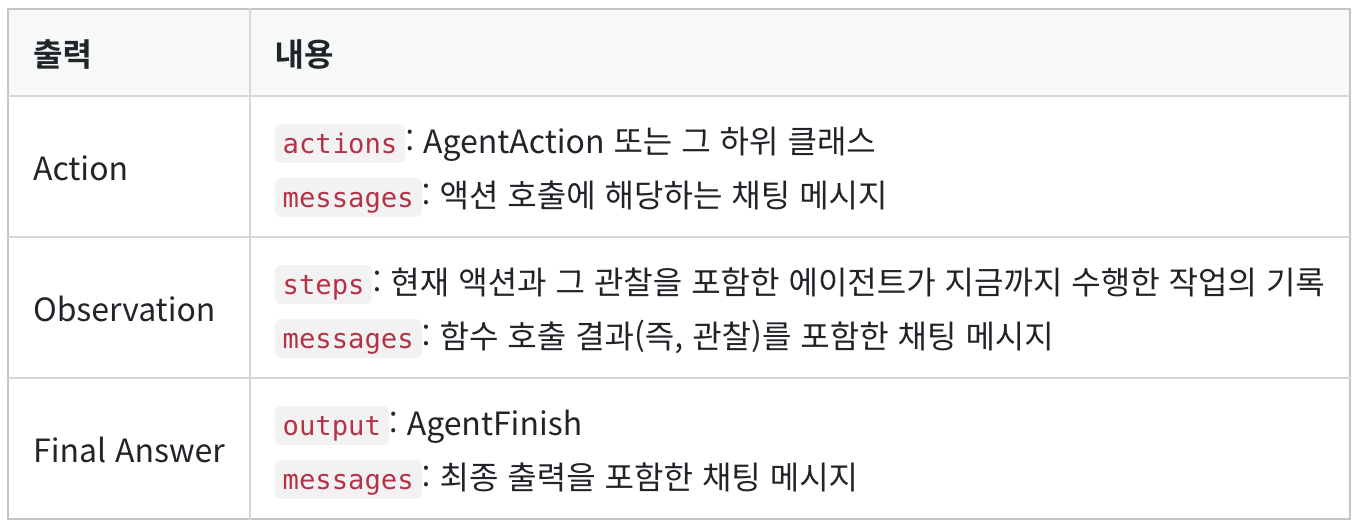



In [22]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(
    agent = agent,
    tools = tools,
    verbose = False, # 실행중인 에이전트의 동작 과정을 얼마나 상세하게 출력할지 제어하는 옵션
    handle_parsing_errors =True,
)

In [23]:
result = agent_executor.stream({"input":"AI 투자와 관련된 뉴스를 검색해 주세요."})

for step in result:
  print(step)

{'actions': [ToolAgentAction(tool='search_news', tool_input={'query': 'AI 투자'}, log="\nInvoking: `search_news` with `{'query': 'AI 투자'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_YemLO1bnHbtkLLHs7ka39k8z', 'function': {'arguments': '{"query":"AI 투자"}', 'name': 'search_news'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_e2bde53e6e'}, id='run-847bfb3a-1345-47d0-8bff-e990acc8571f', tool_calls=[{'name': 'search_news', 'args': {'query': 'AI 투자'}, 'id': 'call_YemLO1bnHbtkLLHs7ka39k8z', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'search_news', 'args': '{"query":"AI 투자"}', 'id': 'call_YemLO1bnHbtkLLHs7ka39k8z', 'index': 0, 'type': 'tool_call_chunk'}])], tool_call_id='call_YemLO1bnHbtkLLHs7ka39k8z')], 'messages': [AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_YemLO1bnHbtkLLHs7ka39k8z', 'func

**중간 단계 출력을 사용자 정의 함수로 출력**

- tool_callback: 도구 호출 출력을 처리하는 함수
- observation_callback: 관찰(Observation) 출력을 처리하는 함수
- result_callback: 최종 답변 출력을 처리하는 함

In [2]:
!pip install langchain-teddynote

In [5]:
from langchain_teddynote.messages import AgentStreamParser

agent_stream_parser = AgentStreamParser()

[도구 호출]
Tool: python_repl_tool
code: import matplotlib.pyplot as plt

# 데이터
sizes = [15, 30, 45, 10]
labels = ['A', 'B', 'C', 'D']
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

# 파이 차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart Example')
plt.show()
Log: 
Invoking: `python_repl_tool` with `{'code': "import matplotlib.pyplot as plt\n\n# 데이터\nsizes = [15, 30, 45, 10]\nlabels = ['A', 'B', 'C', 'D']\ncolors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']\n\n# 파이 차트 그리기\nplt.figure(figsize=(8, 6))\nplt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)\nplt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\nplt.title('Pie Chart Example')\nplt.show()"}`





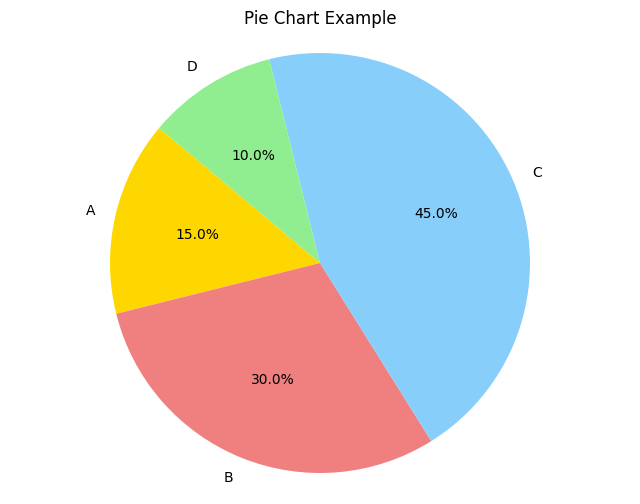

[관찰 내용]
Observation: 
[최종 답변]
코드 실행 결과로 파이 차트가 생성되었습니다. 이 차트는 각 카테고리(A, B, C, D)의 비율을 시각적으로 나타냅니다. 각 조각의 크기는 주어진 데이터에 따라 다르며, 퍼센트 값도 표시되어 있습니다. 

차트의 제목은 "Pie Chart Example"입니다.


In [24]:
result = agent_executor.stream({"input":"matplotlib을 사용하여 pie 차트를 그리는 코드를 작성하고 실행하시오."})

for step in result:
  agent_stream_parser.process_agent_steps(step)

In [26]:
# callback을 수정하여 사용하는 방법

# AgentCallbacks와 AgentStreamParser를 langchain_teddynote.messages에서 가져옵니다.
from langchain_teddynote.messages import AgentCallbacks, AgentStreamParser


# 도구 호출 시 실행되는 콜백 함수입니다.
def tool_callback(tool) -> None:
    print("<<<<<<< 도구 호출 >>>>>>")
    print(f"Tool: {tool.get('tool')}")  # 사용된 도구의 이름을 출력합니다.
    print("<<<<<<< 도구 호출 >>>>>>")


# 관찰 결과를 출력하는 콜백 함수입니다.
def observation_callback(observation) -> None:
    print("<<<<<<< 관찰 내용 >>>>>>")
    print(
        f"Observation: {observation.get('observation')[0]}"
    )  # 관찰 내용을 출력합니다.
    print("<<<<<<< 관찰 내용 >>>>>>")


# 최종 결과를 출력하는 콜백 함수입니다.
def result_callback(result: str) -> None:
    print("<<<<<<< 최종 답변 >>>>>>")
    print(result)  # 최종 답변을 출력합니다.
    print("<<<<<<< 최종 답변 >>>>>>")


# AgentCallbacks 객체를 생성하여 각 단계별 콜백 함수를 설정합니다.
agent_callbacks = AgentCallbacks(
    tool_callback=tool_callback,
    observation_callback=observation_callback,
    result_callback=result_callback,
)

# AgentStreamParser 객체를 생성하여 에이전트의 실행 과정을 파싱합니다.
agent_stream_parser = AgentStreamParser(agent_callbacks)


In [27]:
result = agent_executor.stream({"input":"AI 투자관련 뉴스를 검색해 주세요."})

for step in result:
  agent_stream_parser.process_agent_steps(step)

<<<<<<< 도구 호출 >>>>>>
Tool: search_news
<<<<<<< 도구 호출 >>>>>>
<<<<<<< 관찰 내용 >>>>>>
Observation: {'url': 'https://news.google.com/rss/articles/CBMiVkFVX3lxTE53WW9YclpXM3p5SW5wQUItbENzZXFCOGFVbXFpb1ZLeW5NeXdZQnZtOG55RW5VemtEX2Q1S1BDOVNWOGsxQVd5TWp2ZkRvOWNZT2VRcU5n?oc=5', 'content': "[#Let's 스타트업] 생성형AI로 주식투자 포트폴리오 구축 - 네이트 뉴스"}
<<<<<<< 관찰 내용 >>>>>>
<<<<<<< 최종 답변 >>>>>>
다음은 AI 투자와 관련된 최근 뉴스 기사들입니다:

1. [생성형AI로 주식투자 포트폴리오 구축 - 네이트 뉴스](https://news.google.com/rss/articles/CBMiVkFVX3lxTE53WW9YclpXM3p5SW5wQUItbENzZXFCOGFVbXFpb1ZLeW5NeXdZQnZtOG55RW5VemtEX2Q1S1BDOVNWOGsxQVd5TWp2ZkRvOWNZT2VRcU5n?oc=5)

2. [“미래 먹거리 위해 돈싸들고 몰려온다”...‘AI 4대 석학’ 유명교수가 투자한 ‘이 나라’ - 매일경제](https://news.google.com/rss/articles/CBMiUkFVX3lxTE43c0pjUzdDcUJ4VEZNeFotMDNXSzBYZUZVN2tRdVBBZWFkVTZodGx1V3ZRQlhMWGhxdW9RcjBFeFZ1RWlXYnZuZGUtUmhaQS1iQlE?oc=5)

3. [AI반도체 2차 랠리 시작… 삼성전자 사모은 개인투자자도 웃었다 - 아주경제](https://news.google.com/rss/articles/CBMiWkFVX3lxTE9COTVMS25IZGJDSlZTc0RROFpnYWxWY3RNSXowLXJoaG5ZSnctVUltR1h4OXRjTC1yYng2anVmN2phY

**이전 대화 내용 기억하는 Agent**

이전의 대화내용을 기억하기 위해서는 RunnableWithMessageHistory 를 사용하여 AgentExecutor 를 감싸준다.

In [75]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

store ={}

# session id를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
  if session_ids not in store:
    store[session_ids] = ChatMessageHistory() # 객체를 생성하여 store에 저장
  return store[session_ids] # 해당 세션 ID에 대한 세션 기록 반환

agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    get_session_history,  # 대화 session id
    input_messages_key = "input",  # 프롬프트의 질문이 입력되는 key
    history_messages_key = "chat_history",  # 프롬프트의 메시지가 입력되는 key
)



In [76]:
response = agent_with_chat_history.stream(
    {"input":"안녕 내이름은 민디야"},
    config = {"configurable":{"session_id":"abc123"}},  # session_id 설정
)

for step in response:
  agent_stream_parser.process_agent_steps(step)

<<<<<<< 최종 답변 >>>>>>
안녕하세요, 민디님! 어떻게 도와드릴까요?
<<<<<<< 최종 답변 >>>>>>


In [78]:



response = agent_with_chat_history.stream(
    {"input": "내 이름이 뭐라고?"},
    # session_id 설정
    config={"configurable": {"session_id": "abc123"}},

)

# 출력 확인
for step in response:
    agent_stream_parser.process_agent_steps(step)


<<<<<<< 최종 답변 >>>>>>
민디님이라고 하셨습니다. 맞나요?
<<<<<<< 최종 답변 >>>>>>


In [81]:
response = agent_with_chat_history.stream(
    {
        "input": "내 이메일 주소는 dsf@naber.com이야 회사이름은 테이노트 주식회사야."
    },
    config = {"configurable":{"session_id":"abc123"}},
)


for step in response:
  agent_stream_parser.process_agent_steps(step)

<<<<<<< 도구 호출 >>>>>>
Tool: search_news
<<<<<<< 도구 호출 >>>>>>
<<<<<<< 관찰 내용 >>>>>>
Observation: {'url': 'https://news.google.com/rss/articles/CBMiakFVX3lxTFB6b3FPREFINURLSy1pVUZDbXB4X3JwaW1fVGNCRks1RklJMDFNTWxCbURTbGMwU05kWVRRLU9xNnVFUkNPVFNLaUlTOThQaDRoQzlKQWtsQnVETnFqbEhGc2hIQnU2RERoS3c?oc=5', 'content': '인사이드 구글 - The Keyword'}
<<<<<<< 관찰 내용 >>>>>>
<<<<<<< 최종 답변 >>>>>>
아래는 셜리 상무님께 보낼 이메일 본문입니다.

---

**수신인:** 셜리 상무님  
**발신인:** 민디 (dsf@naber.com)  
**회사:** 테이노트 주식회사  

안녕하세요, 셜리 상무님.

최근의 주요 뉴스들을 아래와 같이 정리하였습니다. 확인해 주시기 바랍니다.

1. [인사이드 구글 - The Keyword](https://news.google.com/rss/articles/CBMiakFVX3lxTFB6b3FPREFINURLSy1pVUZDbXB4X3JwaW1fVGNCRks1RklJMDFNTWxCbURTbGMwU05kWVRRLU9xNnVFUkNPVFNLaUlTOThQaDRoQzlKQWtsQnVETnFqbEhGc2hIQnU2RERoS3c?oc=5)
2. [쯔진산 아틀라스 혜성, 지구 접근으로 국내 각지에서 관측 - nhk.or.jp](https://news.google.com/rss/articles/CBMiZ0FVX3lxTFB2NGNyQkc5bURUVy1Mbm9xSVJOODNXRmhsYzE1dVQ3cDNhNUJwSGt1Z2l4dm9NWkliQnJXMFpxSDhDMGZoNlFMNkt3R2cyZVJ4azVFRC1aNWlmd1B1WWpEQllUUkRTS0U?oc=5)
3. [그라피소프트, 2

In [80]:
# 질의에 대한 답변을 스트리밍으로 출력 요청
response = agent_with_chat_history.stream(
    {
        "input": "최신 뉴스 5개를 검색해서 이메일의 본문으로 작성해줘. "
        "수신인에는 `셜리 상무님` 그리고, 발신인에는 내 인적정보를 적어줘."
        "정중한 어조로 작성하고, 메일의 시작과 끝에는 적절한 인사말과 맺음말을 적어줘."
    },
    # session_id 설정
    config={"configurable": {"session_id": "abc123"}},
)

# 출력 확인
for step in response:
    agent_stream_parser.process_agent_steps(step)


<<<<<<< 도구 호출 >>>>>>
Tool: search_news
<<<<<<< 도구 호출 >>>>>>
<<<<<<< 관찰 내용 >>>>>>
Observation: {'url': 'https://news.google.com/rss/articles/CBMiakFVX3lxTFB6b3FPREFINURLSy1pVUZDbXB4X3JwaW1fVGNCRks1RklJMDFNTWxCbURTbGMwU05kWVRRLU9xNnVFUkNPVFNLaUlTOThQaDRoQzlKQWtsQnVETnFqbEhGc2hIQnU2RERoS3c?oc=5', 'content': '인사이드 구글 - The Keyword'}
<<<<<<< 관찰 내용 >>>>>>
<<<<<<< 최종 답변 >>>>>>
아래는 셜리 상무님께 보낼 이메일 본문입니다.

---

**수신인:** 셜리 상무님  
**발신인:** 민디 (dsf@naber.com)  

안녕하세요, 셜리 상무님.

최근의 주요 뉴스들을 아래와 같이 정리하였습니다. 확인해 주시기 바랍니다.

1. [인사이드 구글 - The Keyword](https://news.google.com/rss/articles/CBMiakFVX3lxTFB6b3FPREFINURLSy1pVUZDbXB4X3JwaW1fVGNCRks1RklJMDFNTWxCbURTbGMwU05kWVRRLU9xNnVFUkNPVFNLaUlTOThQaDRoQzlKQWtsQnVETnFqbEhGc2hIQnU2RERoS3c?oc=5)
2. [쯔진산 아틀라스 혜성, 지구 접근으로 국내 각지에서 관측 - nhk.or.jp](https://news.google.com/rss/articles/CBMiZ0FVX3lxTFB2NGNyQkc5bURUVy1Mbm9xSVJOODNXRmhsYzE1dVQ3cDNhNUJwSGt1Z2l4dm9NWkliQnJXMFpxSDhDMGZoNlFMNkt3R2cyZVJ4azVFRC1aNWlmd1B1WWpEQllUUkRTS0U?oc=5)
3. [그라피소프트, 2024년 최신 제품 라인업 발표 - 

# Agentic RAG

RAG를 수행하되, Agent를 활용하여 RAG를 수행하면 이를 Agentic RAG라고 한다.

문서 검색을 통해 최신 정보에 접근하여 검색 결괄르 가지고 답변을 생성하는 에이전트

---
**도구(Tools)**

agent가 활용할 도구를 정의하여 agent가 추론을 수행할 때 활용할 수 있음

여기에서는 tavily search 라는 웹 검색 도구 사용


In [84]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults(k=6)

In [85]:
search.invoke("판교 카카오 아지트점의 전화번호는 무엇인가요")

[{'url': 'https://www.instagram.com/dessert39_official/p/C8ltueRRRG0/',
  'content': 'Jun 24, 2024 · ✓ 031-603-5581 ✓ 경기도 성남시, 분당구 판교역로 166, 1층 13번유닛 [백현동, 카카오판교아지트점] 판교역 테크노밸리 안에 디삼구가 쏘옥 판교에\xa0...'},
 {'url': 'https://www.kakaocorp.com/ir/wayToCome',
  'content': '고객센터. 주소: 경기도 성남시 분당구 판교역로 241번길 20 미래에셋 벤처타워 1층 (우)13494. 전화: 1577-3754(카카오 서비스) (유료) 1577-3321(다음 서비스) (유료).Missing:  점 무엇'},
 {'url': 'https://www.114.co.kr/search/detail?comp_id=8060179&comp_tp_cd=GOV&godata_tp_cd=LOCALDATA&upjong_cd=',
  'content': '카카오메이커스, 15442431, 15442431 이며 주소는 경기도 성남시 분당구 백현동 *** 카카오 판교 아지트 *층 일부, 경기도 성남시 분당구 판교역로 ***, 카카오 판교\xa0...'},
 {'url': 'https://m.blog.naver.com/hj961030/222923648353',
  'content': '직접 보면 더 예쁜 카카오프렌즈 판교 아지트점\n\u200b\n모두 모두 카카오프렌즈 판교 아지트점에서 만나요-!\n경기도 성남시 분당구 판교역로 166\n\u200b\n♥n2u1_늘이의 여행일기♥\n이 블로그\n경기도\n카테고리 글\n카테고리\n이 블로그\n경기도\n카테고리 글 8. 21:39\n카카오프렌즈 판교 아지트점\n문구, 펜시\n\u200b\n주소 : 경기 성남시 분당구 판교역로 166 1층\n시간 : 월 - 금 10:00 - 21:00 / 토 - 일 찍는 재미가 쏠쏠해요*-*\n카운터 뒤 쪽으로 가면\n카카

### 문서 기반 문서 검색 도구 : Retriever

pdf 문서를 FAISS DB에 저장하고 조회하는 retriever 생성

In [109]:
!pip install pypdf

In [89]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.8 MB/s eta 0:00:00


In [90]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/SPRI_AI_Brief_2023년12월호_F.pdf")

# chunck_overlap : 텍스트를 나눌때, 각 텍스트 청크 사이에 중복되는 부분의 크기를 지정 (청크들이 겹치는 구간을 설정하는 것)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

split_docs = loader.load_and_split(text_splitter)

vector = FAISS.from_documents(split_docs, OpenAIEmbeddings())

retriever = vector.as_retriever()

In [91]:
retriever.invoke("삼성전자가 개발한 생성형 ai 관련 내용을 문서에서 찾아줘")

[Document(metadata={'source': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 12}, page_content='SPRi AI Brief |  \n2023-12 월호\n10삼성전자 , 자체 개발 생성 AI ‘삼성 가우스 ’ 공개\nn삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스 ’를 공개\nn삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로 , 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유KEY Contents\n£언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스 , 온디바이스 작동 지원\nn삼성전자가 2023 년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스 ’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스 (Gauss) 의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며 , \n온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유\n∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며 , 생성 AI 모델을 다양한 제품에 \n단계적으로 탑재할 계획\nn삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는  \n이미지 모델의 3개 모델로 구성\n∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며 , 메일 작성, 문서 요약, 번역 업무의 \n처리를 지원\n∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이 (code.i)’ 는 대화형 인터페이스로 서비스를 제공하며 \n사내 소프트웨어 개발에 최적화\n∙이미지 모델은 창의적인 이미지를 생성하고 기존 이미지를 원하는 

In [92]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    name="pdf_search",
    description="use this tool to search information from the PDF document",
)

**Agent가 사용할 도구 목록 정의**


In [93]:
tools = [search, retriever_tool]

**Agent 생성**

agent가 활용할 LLM을 정의하고 Agent가 참고할 Prompt 정의

In [94]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

llm = ChatOpenAI(model='gpt-4o-mini',temperature=0)

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. "
            "Make sure to use the `pdf_search` tool for searching information from the PDF document. "
            "If you can't find the information from the PDF document, use the `search` tool for searching information from the web.",
        ),
        ("placeholder","{chat_history}"),
        ("human","{input}"),
        ("placeholder","{agent_scratchpad}"),
    ]
)

In [95]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm, tools, prompt)

In [96]:
from langchain.agents import AgentExecutor

# AgentExecutor 생성
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=False)

**에이전트 실행하기**



In [97]:
from langchain_teddynote.messages import AgentStreamParser

agent_stream_parser = AgentStreamParser()

In [101]:
result = agent_executor.stream(
    {"input":"2024년 프로야구 타이브레이커를 진행한 2팀과 이긴 팀을 검색하여 알려주세요."}
)

for step in result:
  agent_stream_parser.process_agent_steps(step)

[도구 호출]
Tool: tavily_search_results_json
query: 2024년 프로야구 타이브레이커 결과
Log: 
Invoking: `tavily_search_results_json` with `{'query': '2024년 프로야구 타이브레이커 결과'}`



[관찰 내용]
Observation: [{'url': 'https://mksports.co.kr/view/2024/741698/', 'content': '이강철 감독이 이끄는 kt는 1일 수원 kt위즈파크에서 열린 2024 프로야구 kbo리그 5위 결정전(타이브레이커)에서 이숭용 감독의 ssg랜더스에 4-3으로 짜릿한 재역전승을 거뒀다. kt는 정규리그에서 ssg와 나란히 72승 2무 70패를 기록, 공동 5위를 마크했다.'}, {'url': 'https://www.chosun.com/sports/baseball/2024/09/27/YXTPFDPCNMMWSHPVCDXAARQH34/', 'content': "OSEN. 업데이트 2024.09.27. 11:03. 0. 프로야구 역대 최초로 '5위 타이브레이커'가 성사될 가능성이 높아지고 있다. KT와 SSG는 나란히 2경기를 남겨두고 공동 5위가 됐다. SSG는 26일 창원 NC파크에서 열린 NC와 원정 경기에서 10-1로 승리하고 5강 희망을 이어갔다. 선발 ..."}, {'url': 'https://m.sportsworldi.com/view/20241013514700', 'content': '프로야구 삼성은 13일 대구삼성라이온즈파크에서 열린 lg의 2024 신한 sol뱅크 kbo 포스트시즌(ps) 플레이오프(po·5전3선승제) 1차전에서 10-4 대승을 거뒀다. ... 에서 거둔 첫 ps 승리다. 2021년 kt와의 정규시즌 1위 타이브레이커 끝에 라팍 첫 가을야구를 po로 물들였던 ...'}, {'url': 'https://sports.news.nate.com/view/20241001n19848', 'content': '한눈에 보

In [102]:
result = agent_executor.stream(
    {"input":"삼성전자가 자체 개발한 생성형 AI 관련된 정보를 문서에서 찾아주세요."}
)
for step in result:
  agent_stream_parser.process_agent_steps(step)

[도구 호출]
Tool: pdf_search
query: 삼성전자 생성형 AI
Log: 
Invoking: `pdf_search` with `{'query': '삼성전자 생성형 AI'}`



[관찰 내용]
Observation: SPRi AI Brief |  
2023-12 월호
10삼성전자 , 자체 개발 생성 AI ‘삼성 가우스 ’ 공개
n삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 
AI 모델 ‘삼성 가우스 ’를 공개
n삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로 , 온디바이스 작동이 가능한 
삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유KEY Contents
£언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스 , 온디바이스 작동 지원
n삼성전자가 2023 년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 
‘삼성 가우스 ’를 최초 공개
∙정규분포 이론을 정립한 천재 수학자 가우스 (Gauss) 의 이름을 본뜬 삼성 가우스는 다양한 상황에 
최적화된 크기의 모델 선택이 가능
∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며 , 
온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유
∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며 , 생성 AI 모델을 다양한 제품에 
단계적으로 탑재할 계획
n삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는  
이미지 모델의 3개 모델로 구성
∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며 , 메일 작성, 문서 요약, 번역 업무의 
처리를 지원
∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이 (code.i)’ 는 대화형 인터페이스로 서비스를 제공하며 
사내 소프트웨어 개발에 최적화
∙이미지 모델은 창의적인 이미지를 생성하고 기존 이미지를 원

**이전 대화를 기억하는 Agent**

RunnableWtihMessageHistory 사용

In [105]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

store={}

def get_session_history(session_ids):
  if session_ids not in store:
    store[session_ids] = ChatMessageHistory()
  return store[session_ids]


agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    get_session_history,
    input_messages_key = "input",
    history_messages_key = "chat_history",
)

In [106]:
response = agent_with_chat_history.stream(
    {"input":"삼성전자가 개발한 생성형 AI 관련된 정보를 문서에서 찾아주세요."},
    config = {"configurable":{"session_id":"abc123"}},
)

for step in response:
  agent_stream_parser.process_agent_steps(step)

[도구 호출]
Tool: pdf_search
query: 삼성전자 생성형 AI
Log: 
Invoking: `pdf_search` with `{'query': '삼성전자 생성형 AI'}`



[관찰 내용]
Observation: SPRi AI Brief |  
2023-12 월호
10삼성전자 , 자체 개발 생성 AI ‘삼성 가우스 ’ 공개
n삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 
AI 모델 ‘삼성 가우스 ’를 공개
n삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로 , 온디바이스 작동이 가능한 
삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유KEY Contents
£언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스 , 온디바이스 작동 지원
n삼성전자가 2023 년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 
‘삼성 가우스 ’를 최초 공개
∙정규분포 이론을 정립한 천재 수학자 가우스 (Gauss) 의 이름을 본뜬 삼성 가우스는 다양한 상황에 
최적화된 크기의 모델 선택이 가능
∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며 , 
온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유
∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며 , 생성 AI 모델을 다양한 제품에 
단계적으로 탑재할 계획
n삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는  
이미지 모델의 3개 모델로 구성
∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며 , 메일 작성, 문서 요약, 번역 업무의 
처리를 지원
∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이 (code.i)’ 는 대화형 인터페이스로 서비스를 제공하며 
사내 소프트웨어 개발에 최적화
∙이미지 모델은 창의적인 이미지를 생성하고 기존 이미지를 원

In [107]:
response = agent_with_chat_history.stream(
    {"input": "이전의 답변을 영어로 번역해 주세요."},
    # session_id 설정
    config={"configurable": {"session_id": "abc123"}},
)

# 출력 확인
for step in response:
    agent_stream_parser.process_agent_steps(step)


[최종 답변]
Here is the translation of the previous response into English:

1. **Samsung Gauss**: On November 8, 2023, Samsung Electronics unveiled its generative AI model called 'Samsung Gauss' at the 'Samsung AI Forum 2023'. This model consists of three components: language, code, and image models, and is designed to operate on-device.

2. **On-Device Operation**: Samsung Gauss has the advantage of not risking the leakage of user information externally. It is trained on secure data and developed in a way that does not infringe on licenses or personal information.

3. **Model Composition**:
   - **Language Model**: Composed of various models for cloud and on-device use, it supports tasks such as email writing, document summarization, and translation.
   - **Code Model**: The AI coding assistant 'code.i' provides services through an interactive interface and is optimized for in-house software development.
   - **Image Model**: It can generate creative images and modify existing images as d

In [110]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 80.1 MB/s eta 0:00:00


In [113]:
# 필요한 모듈 import
from langchain_core.prompts import ChatPromptTemplate
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.vectorstores import FAISS
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.document_loaders import PyMuPDFLoader
from langchain.tools.retriever import create_retriever_tool
from langchain.agents import create_tool_calling_agent, AgentExecutor
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_teddynote.messages import AgentStreamParser

########## 1. 도구를 정의합니다 ##########

### 1-1. Search 도구 ###
# TavilySearchResults 클래스의 인스턴스를 생성합니다
# k=6은 검색 결과를 6개까지 가져오겠다는 의미입니다
search = TavilySearchResults(k=6)

### 1-2. PDF 문서 검색 도구 (Retriever) ###
# PDF 파일 로드. 파일의 경로 입력
loader = PyMuPDFLoader("/content/SPRI_AI_Brief_2023년12월호_F.pdf")

# 텍스트 분할기를 사용하여 문서를 분할합니다.
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

# 문서를 로드하고 분할합니다.
split_docs = loader.load_and_split(text_splitter)

# VectorStore를 생성합니다.
vector = FAISS.from_documents(split_docs, OpenAIEmbeddings())

# Retriever를 생성합니다.
retriever = vector.as_retriever()

retriever_tool = create_retriever_tool(
    retriever,
    name="pdf_search",  # 도구의 이름을 입력합니다.
    description="use this tool to search information from the PDF document",  # 도구에 대한 설명을 자세히 기입해야 합니다!!
)

### 1-3. tools 리스트에 도구 목록을 추가합니다 ###
# tools 리스트에 search와 retriever_tool을 추가합니다.
tools = [search, retriever_tool]

########## 2. LLM 을 정의합니다 ##########
# LLM 모델을 생성합니다.
llm = ChatOpenAI(model="gpt-4o", temperature=0)

########## 3. Prompt 를 정의합니다 ##########

# Prompt 를 정의합니다 - 이 부분을 수정할 수 있습니다!
# Prompt 정의
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. "
            "Make sure to use the `pdf_search` tool for searching information from the PDF document. "
            "If you can't find the information from the PDF document, use the `search` tool for searching information from the web.",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

########## 4. Agent 를 정의합니다 ##########

# 에이전트를 생성합니다.
# llm, tools, prompt를 인자로 사용합니다.
agent = create_tool_calling_agent(llm, tools, prompt)

########## 5. AgentExecutor 를 정의합니다 ##########

# AgentExecutor 클래스를 사용하여 agent와 tools를 설정하고, 상세한 로그를 출력하도록 verbose를 True로 설정합니다.
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=False)

########## 6. 채팅 기록을 수행하는 메모리를 추가합니다. ##########

# session_id 를 저장할 딕셔너리 생성
store = {}


# session_id 를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
    if session_ids not in store:  # session_id 가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환


# 채팅 메시지 기록이 추가된 에이전트를 생성합니다.
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # 대화 session_id
    get_session_history,
    # 프롬프트의 질문이 입력되는 key: "input"
    input_messages_key="input",
    # 프롬프트의 메시지가 입력되는 key: "chat_history"
    history_messages_key="chat_history",
)

########## 7. Agent 파서를 정의합니다. ##########
agent_stream_parser = AgentStreamParser()


In [114]:
# 질의에 대한 답변을 출력합니다.
response = agent_with_chat_history.stream(
    {"input": "구글이 앤스로픽에 투자한 금액을 문서에서 찾아줘"},
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "abc123"}},
)

for step in response:
    agent_stream_parser.process_agent_steps(step)

[도구 호출]
Tool: pdf_search
query: 구글 앤스로픽 투자 금액
Log: 
Invoking: `pdf_search` with `{'query': '구글 앤스로픽 투자 금액'}`



[관찰 내용]
Observation: 1. 정책/법제  
2. 기업/산업 
3. 기술/연구 
 4. 인력/교육
구글, 앤스로픽에 20억 달러 투자로 생성 AI 협력 강화 
n 구글이 앤스로픽에 최대 20억 달러 투자에 합의하고 5억 달러를 우선 투자했으며, 앤스로픽은 
구글과 클라우드 서비스 사용 계약도 체결
n 3대 클라우드 사업자인 구글, 마이크로소프트, 아마존은 차세대 AI 모델의 대표 기업인 
앤스로픽 및 오픈AI와 협력을 확대하는 추세
KEY Contents
£ 구글, 앤스로픽에 최대 20억 달러 투자 합의 및 클라우드 서비스 제공
n 구글이 2023년 10월 27일 앤스로픽에 최대 20억 달러를 투자하기로 합의했으며, 이 중 5억 
달러를 우선 투자하고 향후 15억 달러를 추가로 투자할 방침
∙구글은 2023년 2월 앤스로픽에 이미 5억 5,000만 달러를 투자한 바 있으며, 아마존도 지난 9월 
앤스로픽에 최대 40억 달러의 투자 계획을 공개
∙한편, 2023년 11월 8일 블룸버그 보도에 따르면 앤스로픽은 구글의 클라우드 서비스 사용을 위해 
4년간 30억 달러 규모의 계약을 체결
∙오픈AI 창업자 그룹의 일원이었던 다리오(Dario Amodei)와 다니엘라 아모데이(Daniela Amodei) 
남매가 2021년 설립한 앤스로픽은 챗GPT의 대항마 ‘클로드(Claude)’ LLM을 개발
n 아마존과 구글의 앤스로픽 투자에 앞서, 마이크로소프트는 차세대 AI 모델의 대표 주자인 오픈
AI와 협력을 확대
∙마이크로소프트는 오픈AI에 앞서 투자한 30억 달러에 더해 2023년 1월 추가로 100억 달러를 
투자하기로 하면서 오픈AI의 지분 49%를 확보했으며, 오픈AI는 마이크로소프트의 애저(Azure) 
클라우드 플랫폼을 사용해 AI 모델을 훈련
£ 

In [115]:
# 질의에 대한 답변을 출력합니다.
response = agent_with_chat_history.stream(
    {"input": "이전의 답변을 영어로 번역해 주세요"},
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "abc123"}},
)

for step in response:
    agent_stream_parser.process_agent_steps(step)

[최종 답변]
Google has agreed to invest up to $2 billion in Anthropic, with an initial investment of $500 million. They plan to invest an additional $1.5 billion in the future.


In [118]:
response = agent_with_chat_history.stream(
    {
        "input": "2024년 프로야구 플레이오프 진출 5개팀을 검색해서 알려주세요. 한글로 답변하세요"
    },
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "abc456"}},
)

for step in response:
    agent_stream_parser.process_agent_steps(step)

[도구 호출]
Tool: tavily_search_results_json
query: 2024년 프로야구 플레이오프 진출팀
Log: 
Invoking: `tavily_search_results_json` with `{'query': '2024년 프로야구 플레이오프 진출팀'}`



[관찰 내용]
Observation: [{'url': 'https://m.blog.naver.com/baekhw1/223604883231?isInf=true', 'content': 'Oct 3, 2024 · 가을야구는 5위까지 참가할 수 있다. 진출팀은 5위 KT위즈, 4위 두산베어스. 3위 LG트윈스, 2위 삼성라이온즈.'}, {'url': 'https://www.hani.co.kr/arti/sports/baseball/1159732.html', 'content': '2024년 최강팀 가릴 가을야구, 10월2일 막 오른다 2024년 최강팀 가릴 가을야구, 10월2일 막 오른다 2024년 9월16일 서울 잠실야구장에서 열린 프로야구 KBO리그 키움 히어로즈와 두산 베어스의 경기에서 관중들이 응원전을 하고 있다. 2024 KBO리그 포스트시즌이 10월2일 와일드카드 1차전을 시작으로 막을 올린다. 와일드카드 결정전에서 5위 팀은 두 경기에서 모두 이겨야만 준플레이오프에 진출할 수 있다. 3위로 정규리그를 마감한 엘지(LG) 트윈스는 10월5일 홈구장인 잠실야구장에서 준플레이오프 첫 경기를 치른다. 5전3선승제로 진행되는 준플레이오프는 3위 팀 홈구장에서 1·2·5차전을, 와일드카드 결정전 승리 팀의 홈구장에서 3·4차전을 치른다. [단독] 의료 취약지 ‘건강격차 해소’ 예산 24억 전액 깎였다 대통령까지 나섰지만…10명 중 7명 “일과 삶, 균형 못 이뤘다”  [단독] 의료 취약지 ‘건강격차 해소’ 예산 24억 전액 삭감됐다  [단독] 김건희 결혼 후에도 ‘도이치 주식매수’ 정황…흔들리는 윤 해명  [단독] 군 딥페이크 성범죄 접수 한달새 36건…피해자 모두 여성 '}, {'url':

In [117]:
# 질의에 대한 답변을 출력합니다.
response = agent_with_chat_history.stream(
    {"input": "이전의 답변을 SNS 게시글 형태로 100자 내외로 작성하세요."},
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "abc456"}},
)

for step in response:
    agent_stream_parser.process_agent_steps(step)

[최종 답변]
2024 프로야구 플레이오프 진출팀: KT 위즈, 두산 베어스, LG 트윈스, 삼성 라이온즈! 가을야구의 열기를 함께 느껴보세요! #프로야구 #플레이오프 #가을야구


In [119]:
# 질의에 대한 답변을 출력합니다.
response = agent_with_chat_history.stream(
    {"input": "이전의 답변에 한국 시리즈 일정을 추가하세요."},
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "abc456"}},
)

for step in response:
    agent_stream_parser.process_agent_steps(step)

[도구 호출]
Tool: tavily_search_results_json
query: 2024 한국 시리즈 일정
Log: 
Invoking: `tavily_search_results_json` with `{'query': '2024 한국 시리즈 일정'}`



[관찰 내용]
Observation: [{'url': 'https://twitter.com/Kiatigers/status/1841374915137863757', 'content': 'Oct 2, 2024 · 2024 한국시리즈 일정 안내드립니다. 1️⃣차전 10/21(월) 18:30 광주 2️⃣차전 10/22(화) 18:30 광주 3️⃣차전 10/24(목) 18:30 PO 승리팀 홈 4️⃣차전 10/25(금)\xa0...'}, {'url': 'https://www.instagram.com/always_kia_tigers/p/DAnN8V3BHvT/', 'content': 'Oct 2, 2024 · 2024 한국시리즈 일정 안내 1️⃣차전 10/21(월) 18:30 광주 2️⃣차전 10/22(화) 18:30 광주 3️⃣차전 10/24(목) 18:30 PO 승리팀 홈'}, {'url': 'https://ko.wikipedia.org/wiki/2024%EB%85%84_%ED%95%9C%EA%B5%AD%EC%8B%9C%EB%A6%AC%EC%A6%88', 'content': '2024 신한 SOL Bank KBO 한국시리즈는 2024년 10월 21일부터 10월 29일까지 펼쳐질 예정인 2024년 KBO 리그의 챔피언 결정전이다. 대진은 2024년 KBO 리그 정규 시즌 1\xa0...'}, {'url': 'https://m.blog.naver.com/qhadldhaus98/223605904423', 'content': '2024 KBO 한국 프로야구 포스트시즌 일정 순위 예매 (와일드카드 준플레이오프 플레이오프 한국시리즈) : 네이버 블로그 2024 KBO 한국 프로야구 포스트시즌 일정 순위 예매 (와일드카드 준플

참고 : https://wikidocs.net/233782
